In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cars=pd.read_csv("archive-4/CAR DETAILS FROM CAR DEKHO.csv")

In [3]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
cars.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
cars['year'].describe().to_frame()

,year
count,4340.000000
mean,2013.090783
std,4.215344
min,1992.000000
25%,2011.000000
50%,2014.000000
75%,2016.000000
max,2020.000000


In [6]:
cars['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [7]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [8]:
cars['seller_type']=lbl.fit_transform(cars['seller_type'])

In [9]:
cars['fuel']=cars['fuel'].map({'Petrol':1,'Diesel':2,'CNG':3,'LPG':4,'Electric':5})

In [10]:
cars['km_driven'].describe()

count      4340.000000
mean      66215.777419
std       46644.102194
min           1.000000
25%       35000.000000
50%       60000.000000
75%       90000.000000
max      806599.000000
Name: km_driven, dtype: float64

In [11]:
kms=[]
for i in cars.km_driven:
    if i<=100000:
        kms.append(1)
    elif i>=400000:
        kms.append(3)
    else:
        kms.append(2)
cars['Kms Driven']=kms

In [12]:
cars.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Kms Driven
0,Maruti 800 AC,2007,60000,70000,1,1,Manual,First Owner,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,1,Manual,First Owner,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,1,Manual,First Owner,1
3,Datsun RediGO T Option,2017,250000,46000,1,1,Manual,First Owner,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,1,Manual,Second Owner,2


In [13]:
cars['selling_price'].unique()

array([  60000,  135000,  600000,  250000,  450000,  140000,  550000,
        240000,  850000,  365000,  260000, 1650000,  585000, 1195000,
        390000, 1964999, 1425000,  975000, 1190000,  930000,  525000,
       1735000, 1375000,  900000, 1300000, 1400000,  229999, 1550000,
       1250000,  625000, 1050000,  560000,  290000,  275000,  411000,
        150000,  500000,  100000,  725000,  401000,  750000,  310000,
        665000,  465000,  160000,  675000,  300000,   70000,  151000,
        280000,  350000,  570000,  125000,  130000,  925000,  200000,
        248000,   80000,  650000,  495000,  371000, 1025000, 8150000,
        325000, 1470000, 2800000,  210000, 1150000, 4500000, 2750000,
       1975000,  175000, 2500000,  628000,  399000,  315000,  780000,
        434000,  690000,  555000,  120000,  165000,   95000,  800000,
        840000,  490000,  400000, 1000000,  530000,   40000,   75000,
        540000,  700000,  430000,   65000,  195000,  170000,  225000,
         99000,  620

In [14]:
cars['transmission']=cars['transmission'].map({'Manual':1,'Automatic':2})

In [15]:
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,Kms Driven
0,Maruti 800 AC,2007,60000,70000,1,1,1,First Owner,1
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,1,1,First Owner,1
2,Hyundai Verna 1.6 SX,2012,600000,100000,2,1,1,First Owner,1
3,Datsun RediGO T Option,2017,250000,46000,1,1,1,First Owner,1
4,Honda Amaze VX i-DTEC,2014,450000,141000,2,1,1,Second Owner,2


In [16]:
cars['owner']=cars['owner'].map({'First Owner':1,'Second Owner':2,'Third Owner':3,'Fourth & Above Owner':4,'Test Drive Car':5})

In [17]:
sp=[]
for j in cars.selling_price:
    if j<=500000:
        sp.append(1)
    elif j>=2000000:
        sp.append(3)
    else:
        sp.append(2)
cars['sprice']=sp

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500)

In [19]:
x=pd.DataFrame()
x=cars

In [20]:
x.shape

(4340, 10)

In [21]:
x=x.drop(columns={'selling_price','name','km_driven'})

In [22]:
x.head()

,year,fuel,seller_type,transmission,owner,Kms Driven,sprice
0,2007,1,1,1,1,1,1
1,2007,1,1,1,1,1,1
2,2012,2,1,1,1,1,2
3,2017,1,1,1,1,1,1
4,2014,2,1,1,2,2,1


In [23]:
y=pd.DataFrame()
y['sellprice']=x['sprice']

In [24]:
x=x.drop(columns={'sprice'})

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [26]:
rf.fit(x_train,np.ravel(y_train))

RandomForestClassifier(n_estimators=500)

In [27]:
y_pred=rf.predict(x_test)

In [28]:
rf.score(x_test,np.ravel(y_test))

0.8164362519201229

In [29]:
from sklearn.metrics import accuracy_score

In [30]:
accscore=accuracy_score(y_test,y_pred)
accscore

0.8164362519201229

In [31]:
from sklearn.model_selection import cross_val_score,KFold
cv_score=cross_val_score(rf,x,np.ravel(y),cv=KFold(n_splits=5))
print(cv_score)
print(sum(cv_score)/len(cv_score))

[0.81221198 0.82603687 0.84447005 0.82488479 0.77534562]
0.8165898617511521


In [32]:
m=pd.DataFrame()
m=cars
feature_importance=pd.DataFrame({'RF':rf.feature_importances_},index=m.drop(columns=['name','selling_price','km_driven','sprice']).columns)
feature_importance.sort_values(by='RF',ascending=True,inplace=True)
feature_importance

,RF
Kms Driven,0.027913
owner,0.078580
seller_type,0.085455
transmission,0.132224
fuel,0.172982
year,0.502846


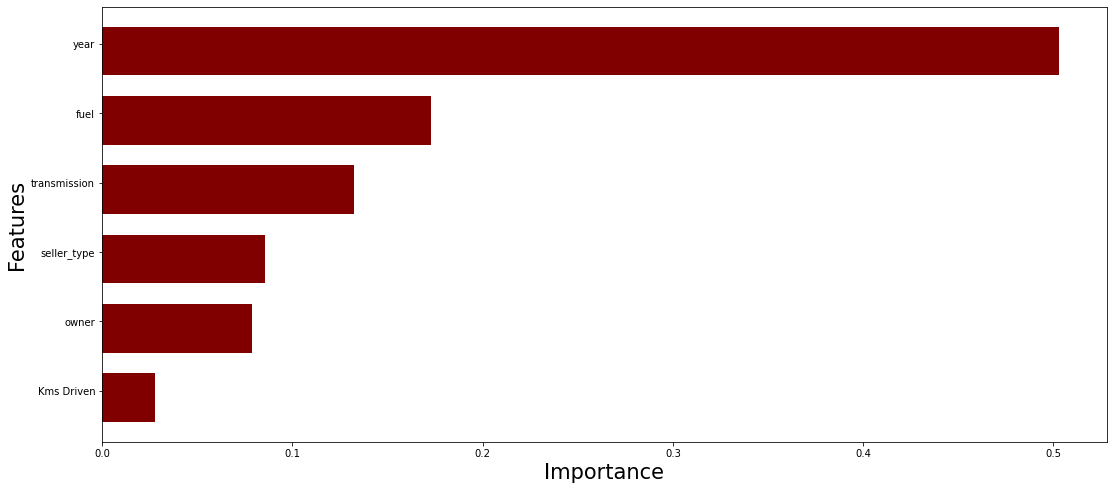

In [33]:
index = np.arange(len(feature_importance))
fig, ax = plt.subplots(figsize=(18,8))
rfc_feature=ax.barh(index,feature_importance['RF'],0.7,color='maroon')
plt.xlabel('Importance',fontsize=21)
plt.ylabel('Features',fontsize=21)
ax.set(yticks=index+0.1,yticklabels=feature_importance.index)
plt.show()